In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
# To avoid encoding error, use unicode_escape

In [9]:
df.shape

(11251, 15)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
#Drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [16]:
#Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.shape

(11251, 13)

In [18]:
#Drop null values
df.dropna(inplace=True)

In [19]:
df.shape

(11239, 13)

In [21]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [22]:
df['Amount'].dtypes

dtype('int32')

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis

### Gender

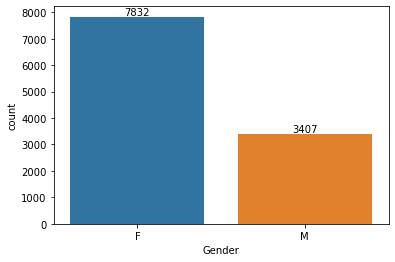

In [24]:
ax = sns.countplot(x ='Gender' ,data = df)
for bars in ax.containers:  #To put labels in bar chart
    ax.bar_label(bars)

In [25]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

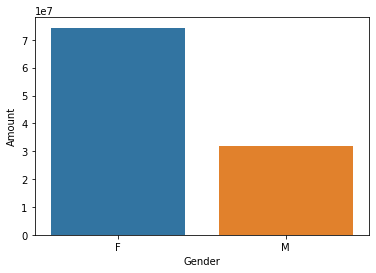

In [26]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)
sns.barplot(x = 'Gender' ,y= 'Amount' , data = sales_gen)

##### From above graph we can see that most of the buyers are females and even the purchasing power of female are greater than male

### Age

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

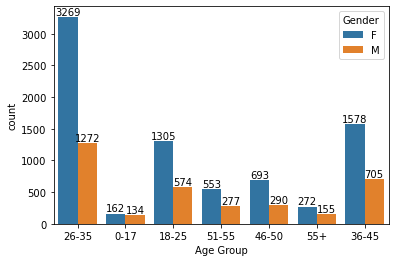

In [28]:
ax = sns.countplot(data = df, x = 'Age Group' , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

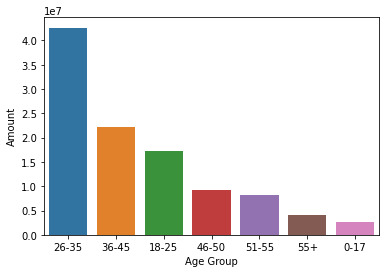

In [29]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by ='Amount', ascending=False)
sns.barplot(x ='Age Group' ,y= 'Amount', data= sales_age)

##### From above graphs we can see that most of the buyers are of age group between 26-35 female 

### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

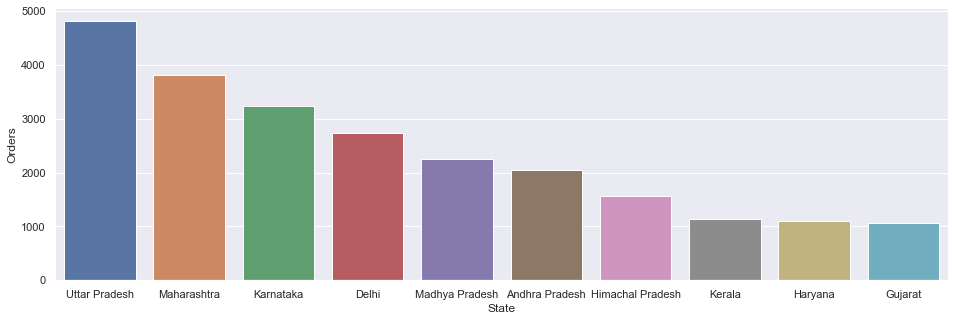

In [31]:
#Total number of orders from Top 10 states
sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={ 'figure.figsize' : (16,5)})
sns.barplot(data= sales_state, x = 'State', y= 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

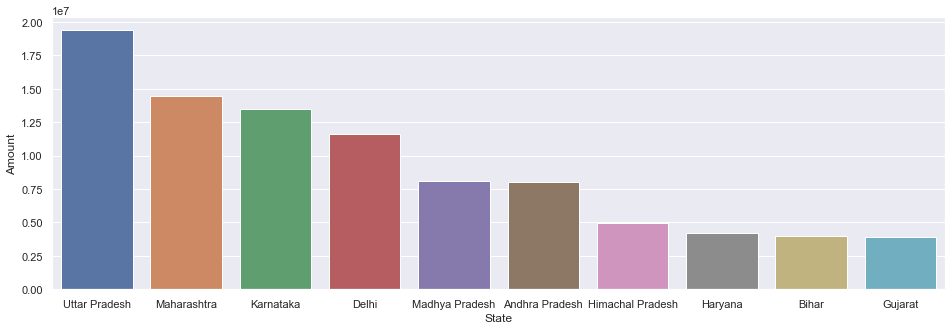

In [32]:
#Total Amount from Top 10 states
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={ 'figure.figsize' : (16,5)})
sns.barplot(data= sales_state, x = 'State', y= 'Amount')

##### From above graphs we can see that most of  the orders & Total sales/Amount are from Uttar Pradesh, Maharashtra and Karnataka 

### Marital Status

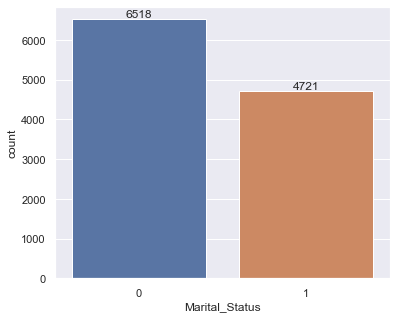

In [37]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={ 'figure.figsize' : (7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

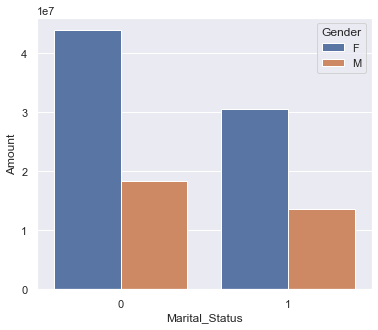

In [52]:
sales_maritalstatus = df.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={ 'figure.figsize' : (6,5)})
sns.barplot(data = sales_maritalstatus, x = 'Marital_Status',y= 'Amount' , hue = 'Gender')

#### From above graphs we can see that most of the buyers are married(women) and they havev high purchasing power

### Occupation

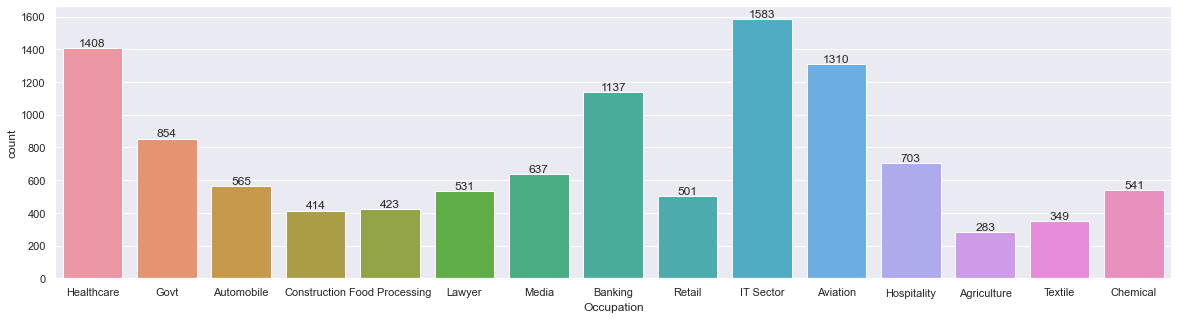

In [46]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data= df, x= 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

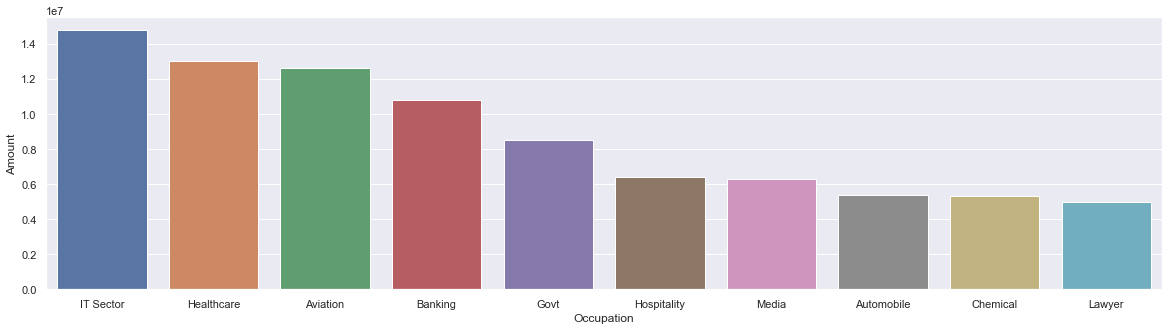

In [47]:
sales_occupation = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={ 'figure.figsize' : (20,5)})
sns.barplot(data= sales_occupation, x = 'Occupation', y= 'Amount')

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

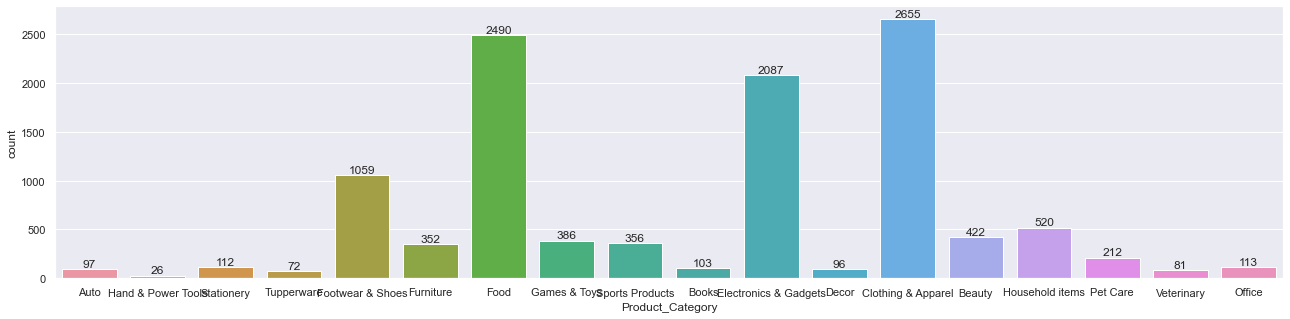

In [49]:
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data= df, x= 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

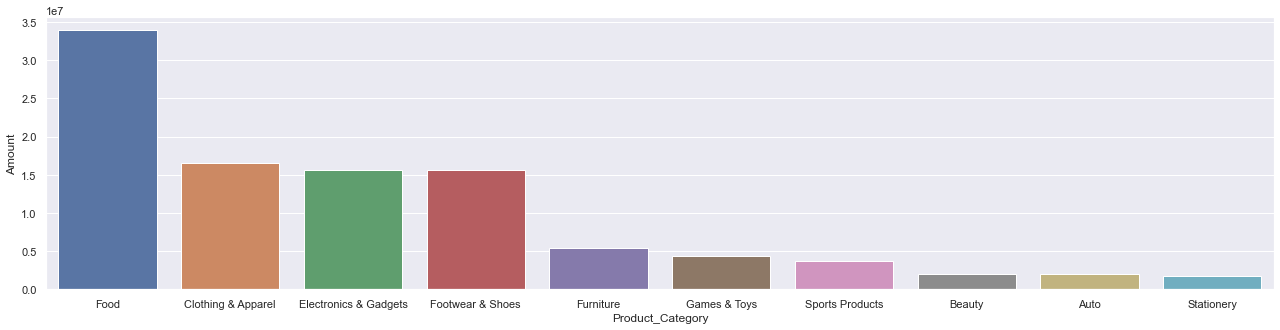

In [53]:
sales_pc = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={ 'figure.figsize' : (22,5)})
sns.barplot(data= sales_pc, x = 'Product_Category', y= 'Amount')

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics & Gadgets category

### Product id

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

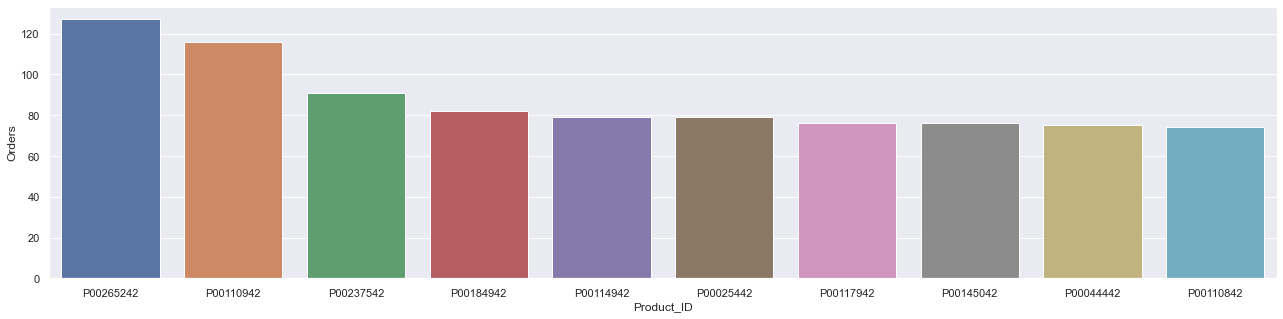

In [54]:
sales_pi = df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={ 'figure.figsize' : (22,5)})
sns.barplot(data= sales_pi, x = 'Product_ID', y= 'Orders')

<AxesSubplot:xlabel='Product_ID'>

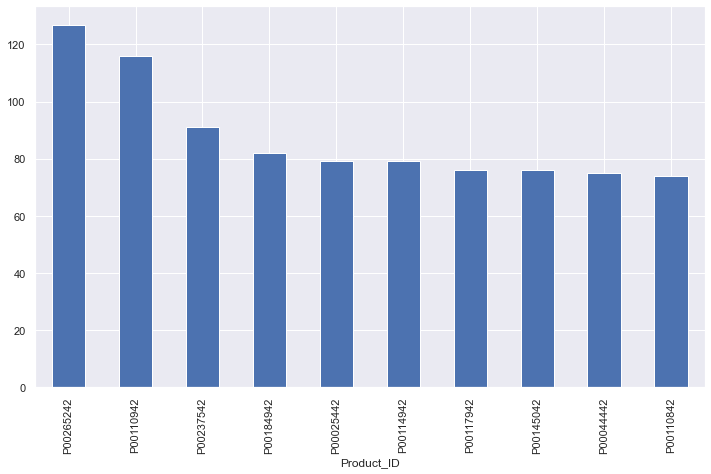

In [57]:
#Top 10 most sold products ( same as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending= False).plot(kind='bar')

### Conclusion

#### Married women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely buy products from Food, Clothing and Electronics & Gadgets category